# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [139]:
#collect needed info using openweathermap api key and requirements
url = "http://api.openweathermap.org/data/2.5/weather?q="
count = 0

print("Beginning Data Retrieval")
print("-----------------------------------")

#Create variables to store data collected
city_name =[]
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#for loop and append function to collect response
for city in cities:
    query = url + city + "&appid="+ weather_api_key+"&units=metric"
    response = requests.get(query)
    response_json = response.json()
    count += 1
    try: #try and except to print retained data while skipping through not found data
        print(f'Processing Record {count}| {city}')
        city_name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        long.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
    except:
        print(f'{city} not found, skipping...')
        pass

Beginning Data Retrieval
-----------------------------------
Processing Record 1| thompson
Processing Record 2| saint george
Processing Record 3| puerto ayora
Processing Record 4| hithadhoo
Processing Record 5| longyearbyen
Processing Record 6| narsaq
Processing Record 7| albany
Processing Record 8| vaini
Processing Record 9| tazovskiy
Processing Record 10| tawnat
tawnat not found, skipping...
Processing Record 11| valdivia
Processing Record 12| iquique
Processing Record 13| atuona
Processing Record 14| saint-philippe
Processing Record 15| nelson bay
Processing Record 16| patnos
Processing Record 17| boden
Processing Record 18| orlik
Processing Record 19| bluff
Processing Record 20| flinders
Processing Record 21| rolla
Processing Record 22| gurskoye
gurskoye not found, skipping...
Processing Record 23| san carlos de bariloche
Processing Record 24| upernavik
Processing Record 25| iqaluit
Processing Record 26| bogorodskoye
Processing Record 27| rikitea
Processing Record 28| beringovskiy


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
#Convert to data frame
all_data = pd.DataFrame({"City":city_name,
          "Latitude": lat,
          "Longitude":long,
          "Max Temp": max_temp,
           "Humidity": humidity,
           "Cloudiness":cloudiness,
           "Wind Speed": wind_speed, 
           "Country": country,
           "Date":date})
all_data.to_csv(output_data_file,index=False)
all_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-3.00,54,90,7.20,CA,1618873983
1,Saint George,37.1041,-113.5841,27.22,7,1,7.72,US,1618873857
2,Puerto Ayora,-0.7393,-90.3518,28.00,74,40,5.14,EC,1618873984
3,Hithadhoo,-0.6000,73.0833,28.07,65,86,2.16,MV,1618873984
4,Longyearbyen,78.2186,15.6401,0.00,93,75,5.66,SJ,1618873985
...,...,...,...,...,...,...,...,...,...
550,Haikou,20.0458,110.3417,25.00,94,75,2.00,CN,1618874272
551,Rancho Palos Verdes,33.7445,-118.3870,23.89,53,1,7.72,US,1618874028
552,Beloha,-25.1667,45.0500,19.79,76,0,5.70,MG,1618874273
553,Omsukchan,62.5333,155.8000,-0.51,89,100,3.13,RU,1618874273


## Inspect the data and remove the cities where the humidity > 100%.


In [141]:
# Above 100% humidity is null
above_100_humidity = all_data.loc[all_data["Humidity"]>100]
above_100_humidity

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [142]:
#  Below or equal 100% humidity.
clean_city_data = all_data.loc[all_data["Humidity"]<=100]
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-3.00,54,90,7.20,CA,1618873983
1,Saint George,37.1041,-113.5841,27.22,7,1,7.72,US,1618873857
2,Puerto Ayora,-0.7393,-90.3518,28.00,74,40,5.14,EC,1618873984
3,Hithadhoo,-0.6000,73.0833,28.07,65,86,2.16,MV,1618873984
4,Longyearbyen,78.2186,15.6401,0.00,93,75,5.66,SJ,1618873985
...,...,...,...,...,...,...,...,...,...
550,Haikou,20.0458,110.3417,25.00,94,75,2.00,CN,1618874272
551,Rancho Palos Verdes,33.7445,-118.3870,23.89,53,1,7.72,US,1618874028
552,Beloha,-25.1667,45.0500,19.79,76,0,5.70,MG,1618874273
553,Omsukchan,62.5333,155.8000,-0.51,89,100,3.13,RU,1618874273


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

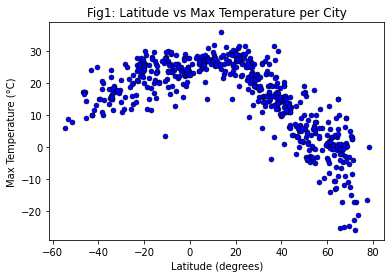

In [143]:
#Plot scatter using matplotlib
xlabel = clean_city_data["Latitude"]
ylabel = clean_city_data["Max Temp"]

plt.scatter(xlabel, ylabel, edgecolor="black", s=25, c ="blue", linewidth=.5)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (°C)")
plt.title("Fig1: Latitude vs Max Temperature per City")

#Save figure
plt.savefig("../output_data/Fig1 Latitude vs Temperature per City")

## Latitude vs. Humidity Plot

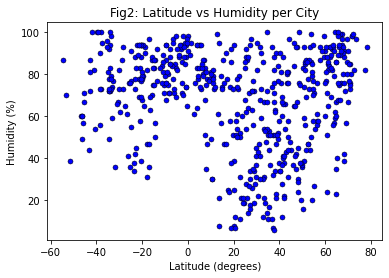

In [144]:
#Plot scatter using matplotlib and save figure
xlabel = clean_city_data["Latitude"]
ylabel = clean_city_data["Humidity"]

plt.scatter(xlabel,ylabel, edgecolor="black", s=25, c ="blue", linewidth=.5)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Fig2: Latitude vs Humidity per City")

#Save figure
plt.savefig("../output_data/Fig2 Latitude vs Humidity per City")

## Latitude vs. Cloudiness Plot

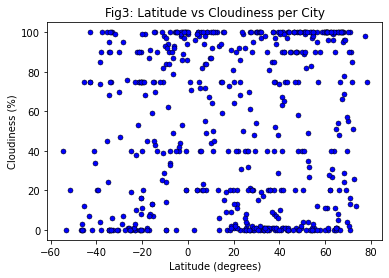

In [145]:
#Plot scatter using matplotlib and save figure
xlabel = clean_city_data["Latitude"]
ylabel = clean_city_data["Cloudiness"]

plt.scatter(xlabel,ylabel, edgecolor="black", s=25, c ="blue", linewidth=.5)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Fig3: Latitude vs Cloudiness per City")

#Save figure
plt.savefig("../output_data/Fig3 Latitude vs Cloudiness per City")

## Latitude vs. Wind Speed Plot

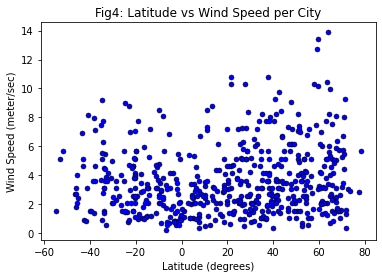

In [146]:
#Plot scatter using matplotlib and save figure
xlabel = clean_city_data["Latitude"]
ylabel = clean_city_data["Wind Speed"]

plt.scatter(xlabel, ylabel, edgecolor="black", s=25, c ="blue", linewidth=.5)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (meter/sec)")
plt.title("Fig4: Latitude vs Wind Speed per City")

#Save figure
plt.savefig("../output_data/Fig4 Latitude vs Wind Speed per City")

## Linear Regression

In [147]:
clean_city_data


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-3.00,54,90,7.20,CA,1618873983
1,Saint George,37.1041,-113.5841,27.22,7,1,7.72,US,1618873857
2,Puerto Ayora,-0.7393,-90.3518,28.00,74,40,5.14,EC,1618873984
3,Hithadhoo,-0.6000,73.0833,28.07,65,86,2.16,MV,1618873984
4,Longyearbyen,78.2186,15.6401,0.00,93,75,5.66,SJ,1618873985
...,...,...,...,...,...,...,...,...,...
550,Haikou,20.0458,110.3417,25.00,94,75,2.00,CN,1618874272
551,Rancho Palos Verdes,33.7445,-118.3870,23.89,53,1,7.72,US,1618874028
552,Beloha,-25.1667,45.0500,19.79,76,0,5.70,MG,1618874273
553,Omsukchan,62.5333,155.8000,-0.51,89,100,3.13,RU,1618874273


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87
The equation of the regression line is: y = -0.57x + 34.96


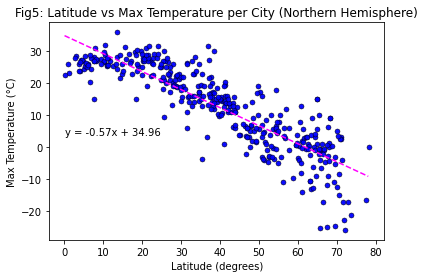

In [148]:
#Use .loc to identify and transfer all cities with latitude lesser than 0° as southern hemisphere cities.
NH = clean_city_data.loc[clean_city_data["Latitude"]>0]

x_values = NH["Latitude"]
y_values = NH["Max Temp"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (°C)")
plt.title("Fig5: Latitude vs Max Temperature per City (Northern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()*.1),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig5 Northern Hemisphere - Latitude vs Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6
The equation of the regression line is: y = 0.25x + 26.01


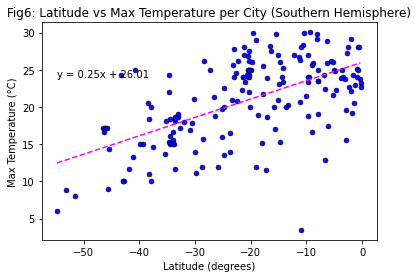

In [149]:
SH = clean_city_data.loc[clean_city_data["Latitude"]<0]

x_values = SH["Latitude"]
y_values = SH["Max Temp"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (°C)")
plt.title("Fig6: Latitude vs Max Temperature per City (Southern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()*.8),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig6 Southern Hemisphere - Latitude vs Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19
The equation of the regression line is: y = 0.24x + 54.28


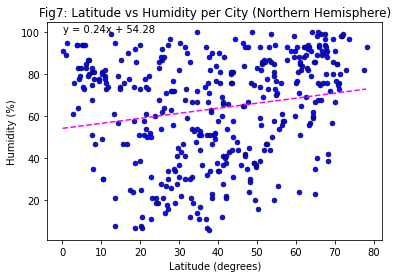

In [150]:
#Use .loc to identify and transfer all cities with latitude lesser than 0° as southern hemisphere cities.
NH = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_values = NH["Latitude"]
y_values = NH["Humidity"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Fig7: Latitude vs Humidity per City (Northern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig7 Northern Hemishphere - Latitude vs Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26
The equation of the regression line is: y = 0.31x + 83.64


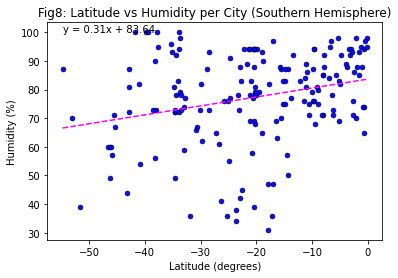

In [151]:
SH = clean_city_data.loc[clean_city_data["Latitude"]<0]

x_values = SH["Latitude"]
y_values = SH["Humidity"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Fig8: Latitude vs Humidity per City (Southern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig8 Southern Hemishphere - Latitude vs Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.045
The equation of the regression line is: y = 0.09x + 47.47


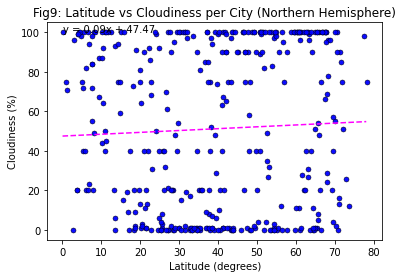

In [152]:
#Using .loc to identify and transfer all cities with latitude lesser than 0° as southern hemisphere cities.
NH = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_values = NH["Latitude"]
y_values = NH["Cloudiness"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Fig9: Latitude vs Cloudiness per City (Northern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig9 Northern Hemishphere - Latitude vs Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36
The equation of the regression line is: y = 1.03x + 72.48


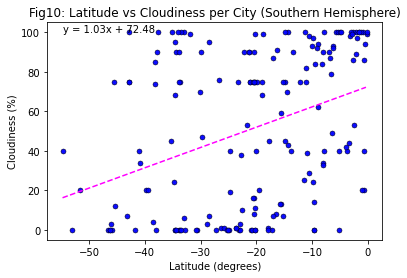

In [153]:
SH = clean_city_data.loc[clean_city_data["Latitude"]<0]

x_values = SH["Latitude"]
y_values = SH["Cloudiness"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Fig10: Latitude vs Cloudiness per City (Southern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig10 South Latitude vs Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17
The equation of the regression line is: y = 0.02x + 2.92


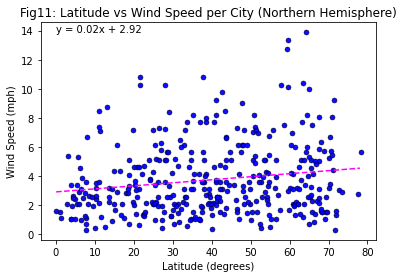

In [154]:
#Using .loc to identify and transfer all cities with latitude lesser than 0° as southern hemisphere cities.
NH = clean_city_data.loc[clean_city_data["Latitude"]>0]
x_values = NH["Latitude"]
y_values = NH["Wind Speed"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("Fig11: Latitude vs Wind Speed per City (Northern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig11 Northern Hemisphere - Latitude vs Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23
The equation of the regression line is: y = -0.04x + 2.53


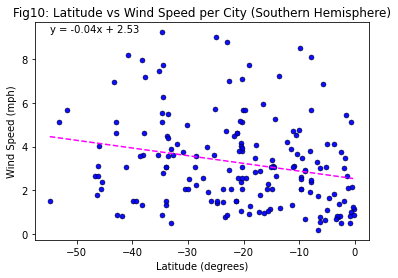

In [155]:
SH = clean_city_data.loc[clean_city_data["Latitude"]<0]

x_values = SH["Latitude"]
y_values = SH["Wind Speed"]

#Plot scatter using matplotlib
plt.scatter(x_values,y_values, edgecolor="black", s=25, c ="blue", linewidth=.5, alpha=0.95)
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("Fig10: Latitude vs Wind Speed per City (Southern Hemisphere)")


#create the separate parts of a linear regression
slope, inter, r, p, std_err = linregress(x_values, y_values)
print(f'The r-value is: {r:.2}')

#create a range for the linear regression
xrange = np.arange(x_values.min(),x_values.max(),.25, dtype="float")
xrange

#create points to graph the linear regression
fit = slope *xrange  + inter
line = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
print(f"The equation of the regression line is: {line}")

#Plot the linear regression
plt.plot(xrange,fit,"--", color="magenta")
plt.annotate(line,(x_values.min(),y_values.max()),fontsize=10,color="black")

#Save figure
plt.savefig("../output_data/Fig12 Southern Hemisphere - Latitude vs Wind Speed")

In [156]:
#Observations: 
#1. the equation line of regression prove the obvious correlation of latitude and temperature in relation to the equator moving up the northern hemisphere(-0.86 and 0.68 r-values = more than 50% correlation for both hemispheres) With only latitude coordinates we can predict the weather for both hemispheres. 
#2. As opposed to latitude and temperature, humidity - cloudiness - wind Speed show a minimal correlation; a scattered plot with many outliers. Predicting the weather based on these three variables would not be credible. 